In [180]:
# Loading packages
using LinearAlgebra
using Plots
using Random

In [181]:
# Defining our dataset - creating arrays

features = [[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]]
labels = [0,0,0,0,1,1,1,1]

table = hcat(features, labels)

8×2 Matrix{Any}:
 [1, 0]  0
 [0, 2]  0
 [1, 1]  0
 [1, 2]  0
 [1, 3]  1
 [2, 2]  1
 [2, 3]  1
 [3, 2]  1

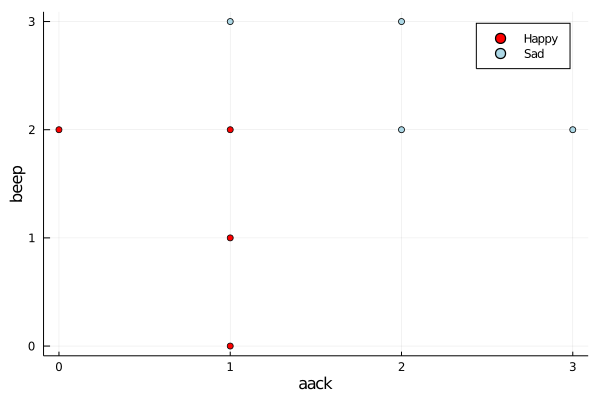

In [182]:
# Plotting the points

x0 = [features[i][1] for i in 1:length(labels) if labels[i] == 0]
y0 = [features[i][2] for i in 1:length(labels) if labels[i] == 0]

x1 = [features[i][1] for i in 1:length(labels) if labels[i] == 1]
y1 = [features[i][2] for i in 1:length(labels) if labels[i] == 1]

scatter(x0, y0, label="Happy", color=:red)
scatter!(x1, y1, label="Sad", color=:lightblue)

xlabel!("aack")
ylabel!("beep")

In [183]:
# This function calculates the dot product between the weight and features and adds the bias and applies the step function

function score(weights, bias, features)
    return dot(features, weights) + bias
end

score (generic function with 1 method)

In [184]:
# This function returns 0 if the weighted sum of inputs plus bias is 0 and 1 if otherwise
function step(x)
    if x >= 0
        return 1
    else
        return 0
    end
end

step (generic function with 1 method)

In [185]:
# It looks at the score and returns 1 if positive/zero and 0 if negative

function prediction(weights, bias, features)
    return step(score(weights, bias, features))
end

prediction (generic function with 1 method)

In [186]:
# This function computes the error between actual and prediction - if predicted value == actual value (Well classified), then error is 0. If not, then error is equal to the absolute value of the score

function error(weights, bias, features, label)
    pred = prediction(weights, bias, features)
    if pred == label
        return 0
    else
        return abs(score(weights, bias, features))
    end
end

error (generic function with 1 method)

In [187]:
# This function calculates the average of the errors of all the points in our dataset

function mean_perceptron_error(weights, bias, features, labels)
    total_error = 0
    for i in 1:length(features)
        total_error += error(weights, bias, features[i], labels[i])
    end
    return total_error / length(features)
end

mean_perceptron_error (generic function with 1 method)

In [188]:
# This function iteratively adjusts the weights and bias in the direction that reduces the error with the goal of improving the model's ability to correctly classify inputs

function perceptron_trick(weights, bias, features, label, learning_rate=0.01)
    pred = prediction(weights, bias, features)

    for i in 1:length(weights)
        weights[i] += (label - pred) * features[i] * learning_rate
    end

    bias += (label - pred) * learning_rate

    return weights, bias
end

perceptron_trick (generic function with 2 methods)

In [189]:
# This function implements the perceptron algorithm which outputs a binary classification 

function perceptron_algorithm(features, labels, learning_rate=0.01, epochs=200)
    Random.seed!(0)
    weights = ones(Float64, length(features[1]))
    bias = 0
    errors = []

    for epoch in 1:epochs
        error = mean_perceptron_error(weights, bias, features, labels)
        push!(errors, error)

        i = rand(1:length(features))
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    end
    
    return weights, bias, errors, predicted_values
end

perceptron_algorithm (generic function with 3 methods)

In [190]:
perceptron_algorithm(features, labels)

([0.4099999999999995, 0.1399999999999994], -0.7100000000000004, Any[1.0, 0.97875, 0.97, 0.97, 0.9612499999999999, 0.9612499999999999, 0.9525, 0.94375, 0.94375, 0.92875  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Any[1.0, 0.97875, 0.97, 0.97, 0.9612499999999999, 0.9612499999999999, 0.9525, 0.94375, 0.94375, 0.92875  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [191]:
# print the weights and bias
weight_aack  = round(perceptron_algorithm(features, labels)[1][1], digits=2)
weight_beep  = round(perceptron_algorithm(features, labels)[1][2], digits=2)
bias = round(perceptron_algorithm(features, labels)[2], digits=2)
print("Weight of aack : $weight_aack \n")
print("Weight of beep : $weight_beep \n")
print("Bias : $bias")

Weight of aack : 0.41 
Weight of beep : 0.14 
Bias : -0.71

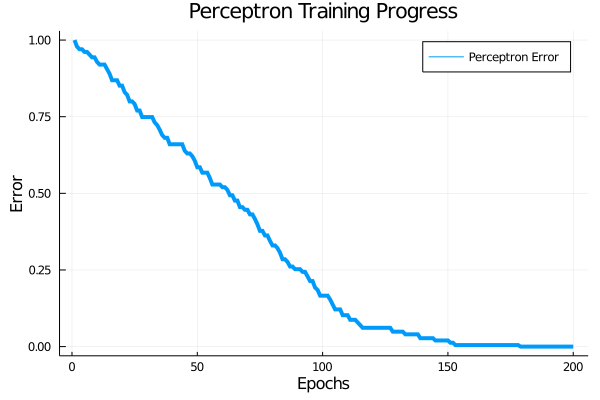

In [192]:
# Plotting the errors over epochs
weights, bias, errors = perceptron_algorithm(features, labels)
plot(1:length(errors), errors, label="Perceptron Error", xlabel="Epochs", ylabel="Error", title="Perceptron Training Progress", linewidth=4)